In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import warnings
import pandas as pd

warnings.filterwarnings(action='ignore',module='tensorflow')

In [0]:
hello = tf.constant('Hello world')
sess = tf.Session()
sess.run(hello)
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2576881873531196925
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9162212640361582177
physical_device_desc: "device: XLA_CPU device"
]


In [11]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## **Model 1**

In [0]:
#Single layer softmax

x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W)+b)
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x:batch_xs, y_:batch_ys})

correct_predictions = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

print(sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))

0.901


In [0]:
def plt_dynamic(x,y,y_1, ax, ticks, title, color=['b']):
  ax.plot(x,y, 'b', label='Train loss')
  ax.plot(x,y_1, 'r', label = 'Test  loss')
  if len(x)==1:
    plt.legend()
    plt.title(title)
  plt.yticks(ticks)
  fig.canvas.draw()
  

## Model 2

Epoch: 0001 train cost=1.571487745 test cost=1.566484674
Epoch: 0002 train cost=1.500309343 test cost=1.501361719
Epoch: 0003 train cost=1.488695869 test cost=1.491904452
Epoch: 0004 train cost=1.482248514 test cost=1.487762637
Epoch: 0005 train cost=1.478110445 test cost=1.485131004
Epoch: 0006 train cost=1.475164547 test cost=1.483353606
Epoch: 0007 train cost=1.473397647 test cost=1.482468967
Epoch: 0008 train cost=1.471389321 test cost=1.481375995
Epoch: 0009 train cost=1.470399070 test cost=1.480892112
Epoch: 0010 train cost=1.469422719 test cost=1.480705170
Epoch: 0011 train cost=1.468756700 test cost=1.480570794
Epoch: 0012 train cost=1.468131680 test cost=1.480431313
Epoch: 0013 train cost=1.467582396 test cost=1.479756822
Epoch: 0014 train cost=1.466482145 test cost=1.479427436
Epoch: 0015 train cost=1.466899492 test cost=1.479756116
Accuracy: 0.9755


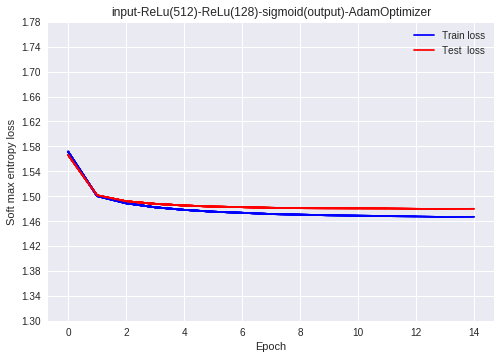

In [19]:
n_hid_1 = 512
n_hid_2 = 128
n_inp = 784
n_cls = 10

x = tf.placeholder(tf.float32,[None,784])
y_ = tf.placeholder(tf.float32, [None, 10])

keep_prob_tr = tf.placeholder(tf.float32)
keep_prob_te = tf.placeholder(tf.float32)

weights_sgd = {'h1':tf.Variable(tf.random_normal([n_inp, n_hid_1], stddev=0.39, mean=0)),
              'h2':tf.Variable(tf.random_normal([n_hid_1, n_hid_2], stddev=0.55, mean=0)),
              'out':tf.Variable(tf.random_normal([n_hid_2, n_cls], stddev=0.12, mean=0))}

weights_relu = {'h1':tf.Variable(tf.random_normal([n_inp, n_hid_1], stddev=0.062, mean=0)),
               'h2':tf.Variable(tf.random_normal([n_hid_1, n_hid_2], stddev=0.125, mean=0)),
               'out': tf.Variable(tf.random_normal([n_hid_2, n_cls], stddev=0.120, mean=0))}

biases = {'b1':tf.Variable(tf.random_normal([n_hid_1])),
         'b2': tf.Variable(tf.random_normal([n_hid_2])),
         'out':tf.Variable(tf.random_normal([n_cls]))}

training_epochs = 15
learning_rate = 0.001
batch_size = 100
display_step = 1

def mlp(x, weights, biases):
  layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
  layer_1 = tf.nn.relu(layer_1)
  
  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  layer_2 = tf.nn.relu(layer_2)
  
  out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
  out_layer = tf.sigmoid(out_layer)
  
  return out_layer


mlp_relu = mlp(x, weights_relu, biases)
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=mlp_relu, labels=y_))
optimizer_relu = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Soft max entropy loss')
  
  xs, ytr, yte = [], [], []
  
  
  for epoch in range(training_epochs):
    train_avg_cost = 0.
    test_avg_cost =0.
    total_batch = int(mnist.train.num_examples/batch_size)


  
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      _,c,w = sess.run([optimizer_relu, cost_relu, weights_relu], feed_dict={x: batch_xs, y_: batch_ys})
      train_avg_cost += c/total_batch
      c = sess.run(cost_relu, feed_dict={x:mnist.test.images, y_:mnist.test.labels})
      test_avg_cost += c/total_batch
    
    xs.append(epoch)
    ytr.append(train_avg_cost)
    yte.append(test_avg_cost)
    plt_dynamic(xs, ytr, yte, ax, np.arange(1.3, 1.8, step=0.04), "input-ReLu(512)-ReLu(128)-sigmoid(output)-AdamOptimizer")

    if epoch%display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

  # plot final results
  plt_dynamic(xs, ytr, yte, ax,np.arange(1.3, 1.8, step=0.04), "input-ReLu(512)-ReLu(128)-sigmoid(output)-AdamOptimizer")

  # we are calculating the final accuracy on the test data
  correct_prediction = tf.equal(tf.argmax(mlp_relu,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))
    

## Model 3

Epoch: 0001 train cost=1.546038464 test cost=1.540821958
Epoch: 0002 train cost=1.493085540 test cost=1.493838643
Epoch: 0003 train cost=1.483174813 test cost=1.487025612
Epoch: 0004 train cost=1.477995852 test cost=1.482986903
Epoch: 0005 train cost=1.474744202 test cost=1.481380302
Epoch: 0006 train cost=1.472108467 test cost=1.480828444
Epoch: 0007 train cost=1.470949577 test cost=1.479783354
Epoch: 0008 train cost=1.469819157 test cost=1.478978523
Epoch: 0009 train cost=1.469132023 test cost=1.478784167
Epoch: 0010 train cost=1.468856179 test cost=1.479377706
Epoch: 0011 train cost=1.467648180 test cost=1.479318025
Epoch: 0012 train cost=1.467449266 test cost=1.479109711
Epoch: 0013 train cost=1.467229244 test cost=1.479088668
Epoch: 0014 train cost=1.466928347 test cost=1.478628253
Epoch: 0015 train cost=1.466672328 test cost=1.479649370
Accuracy: 0.981


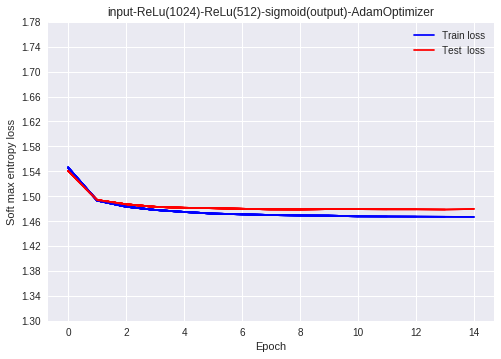

In [20]:
n_hid_1 = 1024
n_hid_2 = 512
n_inp = 784
n_cls = 10

x = tf.placeholder(tf.float32,[None,784])
y_ = tf.placeholder(tf.float32, [None, 10])

keep_prob_tr = tf.placeholder(tf.float32)
keep_prob_te = tf.placeholder(tf.float32)

weights_relu = {'h1':tf.Variable(tf.random_normal([n_inp, n_hid_1], stddev=0.050, mean=0)),
               'h2':tf.Variable(tf.random_normal([n_hid_1, n_hid_2], stddev=0.044, mean=0)),
               'out': tf.Variable(tf.random_normal([n_hid_2, n_cls], stddev=0.062, mean=0))}

biases = {'b1':tf.Variable(tf.random_normal([n_hid_1])),
         'b2': tf.Variable(tf.random_normal([n_hid_2])),
         'out':tf.Variable(tf.random_normal([n_cls]))}

training_epochs = 15
learning_rate = 0.001
batch_size = 100
display_step = 1

def mlp(x, weights, biases):
  layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
  layer_1 = tf.nn.relu(layer_1)
  
  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  layer_2 = tf.nn.relu(layer_2)
  
  out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
  out_layer = tf.sigmoid(out_layer)
  
  return out_layer


mlp_relu = mlp(x, weights_relu, biases)
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=mlp_relu, labels=y_))
optimizer_relu = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Soft max entropy loss')
  
  xs, ytr, yte = [], [], []
  
  
  for epoch in range(training_epochs):
    train_avg_cost = 0.
    test_avg_cost =0.
    total_batch = int(mnist.train.num_examples/batch_size)


  
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      _,c,w = sess.run([optimizer_relu, cost_relu, weights_relu], feed_dict={x: batch_xs, y_: batch_ys})
      train_avg_cost += c/total_batch
      c = sess.run(cost_relu, feed_dict={x:mnist.test.images, y_:mnist.test.labels})
      test_avg_cost += c/total_batch
    
    xs.append(epoch)
    ytr.append(train_avg_cost)
    yte.append(test_avg_cost)
    plt_dynamic(xs, ytr, yte, ax, np.arange(1.3, 1.8, step=0.04), "input-ReLu(1024)-ReLu(512)-sigmoid(output)-AdamOptimizer")

    if epoch%display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

  # plot final results
  plt_dynamic(xs, ytr, yte, ax,np.arange(1.3, 1.8, step=0.04), "input-ReLu(1024)-ReLu(512)-sigmoid(output)-AdamOptimizer")

  # we are calculating the final accuracy on the test data
  correct_prediction = tf.equal(tf.argmax(mlp_relu,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))
    

## Model 4

Epoch: 0001 train cost=1.665745419 test cost=1.592080234
Epoch: 0002 train cost=1.519409406 test cost=1.492084821
Epoch: 0003 train cost=1.502939610 test cost=1.485372858
Epoch: 0004 train cost=1.495779381 test cost=1.482657024
Epoch: 0005 train cost=1.491093225 test cost=1.480846340
Epoch: 0006 train cost=1.487919479 test cost=1.479564512
Epoch: 0007 train cost=1.484984713 test cost=1.478335650
Epoch: 0008 train cost=1.483631849 test cost=1.477935527
Epoch: 0009 train cost=1.481732125 test cost=1.477377241
Epoch: 0010 train cost=1.481191325 test cost=1.476811171
Epoch: 0011 train cost=1.480717178 test cost=1.476757502
Epoch: 0012 train cost=1.478629358 test cost=1.475828145
Epoch: 0013 train cost=1.478409420 test cost=1.475334742
Epoch: 0014 train cost=1.477329294 test cost=1.475524197
Epoch: 0015 train cost=1.477129333 test cost=1.475609389
Accuracy: 0.9827


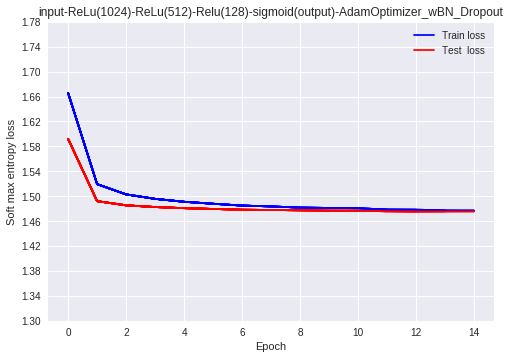

In [24]:
n_hid_1 = 1024
n_hid_2 = 512
n_hid_3 = 128
n_inp = 784
n_cls = 10

x = tf.placeholder(tf.float32,[None,784])
y_ = tf.placeholder(tf.float32, [None, 10])

keep_prob_tr = tf.placeholder(tf.float32)
keep_prob_te = tf.placeholder(tf.float32)

weights_relu = {'h1':tf.Variable(tf.random_normal([n_inp, n_hid_1], stddev=0.050, mean=0)),
               'h2':tf.Variable(tf.random_normal([n_hid_1, n_hid_2], stddev=0.044, mean=0)),
               'h3':tf.Variable(tf.random_normal([n_hid_2, n_hid_3], stddev=0.062, mean=0)),
               'out': tf.Variable(tf.random_normal([n_hid_3, n_cls], stddev=0.124, mean=0))}

biases = {'b1':tf.Variable(tf.random_normal([n_hid_1])),
         'b2': tf.Variable(tf.random_normal([n_hid_2])),
         'b3': tf.Variable(tf.random_normal([n_hid_3])),
         'out':tf.Variable(tf.random_normal([n_cls]))}

training_epochs = 15
learning_rate = 0.001
batch_size = 100
display_step = 1
epsilon = 1e-3

def mlp(x, weights, biases):
  layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
  layer_1 = tf.nn.relu(layer_1)
  layer_1_drop = tf.nn.dropout(layer_1, keep_prob_tr)
  
  layer_2 = tf.add(tf.matmul(layer_1_drop, weights['h2']), biases['b2'])
  layer_2 = tf.nn.relu(layer_2)
  layer_2_drop = tf.nn.dropout(layer_2, keep_prob_tr)
  
  layer_3 = tf.add(tf.matmul(layer_2_drop, weights['h3']), biases['b3'])
  layer_3_drop = tf.nn.dropout(layer_3, keep_prob_tr)
  batch_mean_3, batch_var_3 = tf.nn.moments(layer_3_drop, [0])
  scale_3 = tf.Variable(tf.ones([n_hid_3]))
  beta_3 = tf.Variable(tf.zeros([n_hid_3]))
  layer_3_drop = tf.nn.batch_normalization(layer_3_drop, batch_mean_3, batch_var_3, beta_3, scale_3, epsilon)
  layer_3_drop = tf.nn.relu(layer_3_drop)
  
  out_layer = tf.add(tf.matmul(layer_3_drop, weights['out']), biases['out'])
  out_layer = tf.sigmoid(out_layer)
  
  return out_layer


mlp_relu = mlp(x, weights_relu, biases)
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=mlp_relu, labels=y_))
optimizer_relu = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Soft max entropy loss')
  
  xs, ytr, yte = [], [], []
  
  
  for epoch in range(training_epochs):
    train_avg_cost = 0.
    test_avg_cost =0.
    total_batch = int(mnist.train.num_examples/batch_size)


  
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      _,c,w = sess.run([optimizer_relu, cost_relu, weights_relu], feed_dict={x: batch_xs, y_: batch_ys, keep_prob_tr:0.5})
      train_avg_cost += c/total_batch
      c = sess.run(cost_relu, feed_dict={x:mnist.test.images, y_:mnist.test.labels, keep_prob_tr:1.0})
      test_avg_cost += c/total_batch
    
    xs.append(epoch)
    ytr.append(train_avg_cost)
    yte.append(test_avg_cost)
    plt_dynamic(xs, ytr, yte, ax, np.arange(1.3, 1.8, step=0.04), "input-ReLu(1024)-ReLu(512)-Relu(128)-sigmoid(output)-AdamOptimizer_wBN_Dropout")

    if epoch%display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

  # plot final results
  plt_dynamic(xs, ytr, yte, ax,np.arange(1.3, 1.8, step=0.04), "input-ReLu(1024)-ReLu(512)-Relu(128)-sigmoid(output)-AdamOptimizer_wBN_Dropout")

  # we are calculating the final accuracy on the test data
  correct_prediction = tf.equal(tf.argmax(mlp_relu,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob_tr:1.0}))
    

## Model 5

Epoch: 0001 train cost=1.802266698 test cost=1.682732691
Epoch: 0002 train cost=1.551768458 test cost=1.496727644
Epoch: 0003 train cost=1.520489790 test cost=1.487550196
Epoch: 0004 train cost=1.508878298 test cost=1.484403091
Epoch: 0005 train cost=1.502449824 test cost=1.481904979
Epoch: 0006 train cost=1.498496057 test cost=1.480629074
Epoch: 0007 train cost=1.494956058 test cost=1.479391036
Epoch: 0008 train cost=1.493253020 test cost=1.478812763
Epoch: 0009 train cost=1.490738950 test cost=1.477935618
Epoch: 0010 train cost=1.490239991 test cost=1.477526513
Epoch: 0011 train cost=1.487425790 test cost=1.476404337
Epoch: 0012 train cost=1.487735510 test cost=1.476915840
Epoch: 0013 train cost=1.485708476 test cost=1.476704069
Epoch: 0014 train cost=1.484344537 test cost=1.476180622
Epoch: 0015 train cost=1.483091684 test cost=1.475568813
Accuracy: 0.9816


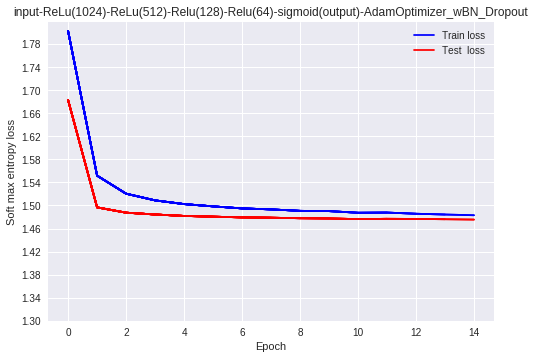

In [27]:
n_hid_1 = 1024
n_hid_2 = 512
n_hid_3 = 128
n_hid_4 = 64
n_inp = 784
n_cls = 10

x = tf.placeholder(tf.float32,[None,784])
y_ = tf.placeholder(tf.float32, [None, 10])

keep_prob_tr = tf.placeholder(tf.float32)
keep_prob_te = tf.placeholder(tf.float32)

weights_relu = {'h1':tf.Variable(tf.random_normal([n_inp, n_hid_1], stddev=0.050, mean=0)),
               'h2':tf.Variable(tf.random_normal([n_hid_1, n_hid_2], stddev=0.044, mean=0)),
               'h3':tf.Variable(tf.random_normal([n_hid_2, n_hid_3], stddev=0.062, mean=0)),
               'h4': tf.Variable(tf.random_normal([n_hid_3, n_hid_4], stddev=0.124, mean=0)),
               'out': tf.Variable(tf.random_normal([n_hid_4, n_cls], stddev=0.175, mean=0)),}

biases = {'b1':tf.Variable(tf.random_normal([n_hid_1])),
         'b2': tf.Variable(tf.random_normal([n_hid_2])),
         'b3': tf.Variable(tf.random_normal([n_hid_3])),
         'b4': tf.Variable(tf.random_normal([n_hid_4])),
         'out':tf.Variable(tf.random_normal([n_cls]))}

training_epochs = 15
learning_rate = 0.001
batch_size = 100
display_step = 1
epsilon = 1e-3

def mlp(x, weights, biases):
  layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
  layer_1 = tf.nn.relu(layer_1)
  layer_1_drop = tf.nn.dropout(layer_1, keep_prob_tr)
  
  layer_2 = tf.add(tf.matmul(layer_1_drop, weights['h2']), biases['b2'])
  layer_2 = tf.nn.relu(layer_2)
  layer_2_drop = tf.nn.dropout(layer_2, keep_prob_tr)
  
  layer_3 = tf.add(tf.matmul(layer_2_drop, weights['h3']), biases['b3'])
  layer_3_drop = tf.nn.dropout(layer_3, keep_prob_tr)
  batch_mean_3, batch_var_3 = tf.nn.moments(layer_3_drop, [0])
  scale_3 = tf.Variable(tf.ones([n_hid_3]))
  beta_3 = tf.Variable(tf.zeros([n_hid_3]))
  layer_3_drop = tf.nn.batch_normalization(layer_3_drop, batch_mean_3, batch_var_3, beta_3, scale_3, epsilon)
  layer_3_drop = tf.nn.relu(layer_3_drop)
  
  layer_4 = tf.add(tf.matmul(layer_3_drop, weights['h4']), biases['b4'])
  layer_4_drop = tf.nn.dropout(layer_4, keep_prob_tr)
  batch_mean_4, batch_var_4 = tf.nn.moments(layer_4_drop, [0])
  scale_4 = tf.Variable(tf.ones([n_hid_4]))
  beta_4 = tf.Variable(tf.zeros([n_hid_4]))
  layer_4_drop = tf.nn.batch_normalization(layer_4_drop, batch_mean_4, batch_var_4, beta_4, scale_4, epsilon)
  layer_4_drop = tf.nn.relu(layer_4_drop)
  
  out_layer = tf.add(tf.matmul(layer_4_drop, weights['out']), biases['out'])
  out_layer = tf.sigmoid(out_layer)
  
  return out_layer


mlp_relu = mlp(x, weights_relu, biases)
cost_relu = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=mlp_relu, labels=y_))
optimizer_relu = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_relu)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Soft max entropy loss')
  
  xs, ytr, yte = [], [], []
  
  
  for epoch in range(training_epochs):
    train_avg_cost = 0.
    test_avg_cost =0.
    total_batch = int(mnist.train.num_examples/batch_size)


  
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      _,c,w = sess.run([optimizer_relu, cost_relu, weights_relu], feed_dict={x: batch_xs, y_: batch_ys, keep_prob_tr:0.5})
      train_avg_cost += c/total_batch
      c = sess.run(cost_relu, feed_dict={x:mnist.test.images, y_:mnist.test.labels, keep_prob_tr:1.0})
      test_avg_cost += c/total_batch
    
    xs.append(epoch)
    ytr.append(train_avg_cost)
    yte.append(test_avg_cost)
    plt_dynamic(xs, ytr, yte, ax, np.arange(1.3, 1.8, step=0.04), "input-ReLu(1024)-ReLu(512)-Relu(128)-Relu(64)-sigmoid(output)-AdamOptimizer_wBN_Dropout")

    if epoch%display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

  # plot final results
  plt_dynamic(xs, ytr, yte, ax,np.arange(1.3, 1.8, step=0.04), "input-ReLu(1024)-ReLu(512)-Relu(128)-Relu(64)-sigmoid(output)-AdamOptimizer_wBN_Dropout")

  # we are calculating the final accuracy on the test data
  correct_prediction = tf.equal(tf.argmax(mlp_relu,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob_tr:1.0}))
    

# Conclusion

**Architecture**:


1.   **Model 1**: Basic Softmax
2.   **Model 2**: input-ReLu(512)-ReLu(128)-sigmoid(output)-AdamOptimizer
3.   **Model 3**: input-ReLu(1024)-ReLu(512)-sigmoid(output)-AdamOptimizer
4.   **Model 4**: input-ReLu(1024)-ReLu(512)-Relu(128)-sigmoid(output)-AdamOptimizer_wBN_Dropout
5.   **Model 5**: input-ReLu(1024)-ReLu(512)-Relu(128)-Relu(64)-sigmoid(output)-AdamOptimizer_wBN_Dropout


| Model | Train cost | Test cost | Accuracy |
| --- | --- | --- | --- |
| Model 1 | N/A | N/A | 90.10 % |
| Model 2 | 1.466 | 1.479 | 97.55 % |
| Model 3 | 1.466 | 1.479 | 98.10 % |
| Model 4 | 1.477 | 1.475 | 98.27 % |
| Model 5 | 1.483 | 1.475 | 98.16 % |